# importing libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing the datasets
frogdata= pd.read_csv("all_frog_data.csv")
frogdata.head()

,Unnamed: 0,gbifID,eventDate,country,continent,stateProvince,decimalLatitude,decimalLongitude,species
0,0,2574007008,1/23/2020 1:38,Australia,Australia,New South Wales,-32.719457,152.159267,Litoria Fallax
1,1,3457021422,3/14/2010 22:23,Costa Rica,Central America,Puntarenas,8.496999,-83.318613,Agalychnis Callidryas
2,2,1571195309,4/11/2014 19:51,Costa Rica,Central America,Heredia,10.450801,-84.068659,Agalychnis Callidryas
3,3,2265778539,7/21/2018 21:24,Costa Rica,Central America,Puntarenas,9.756705,-84.613363,Agalychnis Callidryas
4,4,3407962690,10/29/2021 13:57,Australia,Australia,Queensland,-26.714302,152.815096,Litoria Fallax


In [3]:
ML= pd.read_csv("All_MLOut_new.csv")
ML.head()

,Unnamed: 0,gbifID,country,continent,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean
0,0,2574007008,Australia,Australia,-32.719457,152.159267,Litoria Fallax,1,0,96.00000,118.71667,23.830004,13.908336
1,1,3457021422,Costa Rica,Central America,8.496999,-83.318613,Agalychnis Callidryas,0,1,231.51666,131.88333,31.841667,21.111668
2,2,1571195309,Costa Rica,Central America,10.450801,-84.068659,Agalychnis Callidryas,0,2,279.20000,51.70000,31.341671,22.455004
3,3,2265778539,Costa Rica,Central America,9.756705,-84.613363,Agalychnis Callidryas,0,3,192.10000,171.81667,31.043331,20.061670
4,4,3407962690,Australia,Australia,-26.714302,152.815096,Litoria Fallax,1,4,84.80000,111.61667,25.933338,13.801668


since both of the data set contain some common columns, we will drop the common columns so it doesnt duplicate before we merge them

In [4]:
#dropping duplicate columns
Frogdata= frogdata.drop(['Unnamed: 0','country', 'continent','decimalLatitude', 'decimalLongitude','species' ], axis=1)
Frogdata

,gbifID,eventDate,stateProvince
0,2574007008,1/23/2020 1:38,New South Wales
1,3457021422,3/14/2010 22:23,Puntarenas
2,1571195309,4/11/2014 19:51,Heredia
3,2265778539,7/21/2018 21:24,Puntarenas
4,3407962690,10/29/2021 13:57,Queensland
...,...,...,...
193786,1322002619,NaN,Panamá
193787,1319899134,4/1/1937 0:00,Panamá
193788,1318901755,4/5/1937 0:00,Panamá
193789,1322299951,7/9/2002 0:00,Gracias a Dios


In [5]:
#merging the 2 data sets
Frogml=Frogdata.merge(ML,on='gbifID')
Frogml

,gbifID,eventDate,stateProvince,Unnamed: 0,country,continent,decimalLatitude,decimalLongitude,species,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean
0,2574007008,1/23/2020 1:38,New South Wales,0,Australia,Australia,-32.719457,152.159267,Litoria Fallax,1,0,96.00000,118.71667,23.830004,13.908336
1,3457021422,3/14/2010 22:23,Puntarenas,1,Costa Rica,Central America,8.496999,-83.318613,Agalychnis Callidryas,0,1,231.51666,131.88333,31.841667,21.111668
2,1571195309,4/11/2014 19:51,Heredia,2,Costa Rica,Central America,10.450801,-84.068659,Agalychnis Callidryas,0,2,279.20000,51.70000,31.341671,22.455004
3,2265778539,7/21/2018 21:24,Puntarenas,3,Costa Rica,Central America,9.756705,-84.613363,Agalychnis Callidryas,0,3,192.10000,171.81667,31.043331,20.061670
4,3407962690,10/29/2021 13:57,Queensland,4,Australia,Australia,-26.714302,152.815096,Litoria Fallax,1,4,84.80000,111.61667,25.933338,13.801668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193786,1322002619,NaN,Panamá,193786,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,0,193786,158.16667,214.81667,31.203335,24.071667
193787,1319899134,4/1/1937 0:00,Panamá,193787,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,0,193787,158.16667,214.81667,31.203335,24.071667
193788,1318901755,4/5/1937 0:00,Panamá,193788,Panama,Central America,8.791700,-79.561100,Dendrobates Auratus,0,193788,158.16667,214.81667,31.203335,24.071667
193789,1322299951,7/9/2002 0:00,Gracias a Dios,193789,Honduras,Central America,15.091100,-83.557800,Agalychnis Callidryas,0,193789,190.06667,141.43333,29.326668,23.588335


In [6]:
#get column info
Frogml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193791 entries, 0 to 193790
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   gbifID            193791 non-null  int64  
 1   eventDate         185026 non-null  object 
 2   stateProvince     193099 non-null  object 
 3   Unnamed: 0        193791 non-null  int64  
 4   country           193791 non-null  object 
 5   continent         193791 non-null  object 
 6   decimalLatitude   193791 non-null  float64
 7   decimalLongitude  193791 non-null  float64
 8   species           193791 non-null  object 
 9   occurrenceStatus  193791 non-null  int64  
 10  key               193791 non-null  int64  
 11  ppt_mean          161812 non-null  float64
 12  soil_mean         161812 non-null  float64
 13  tmax_mean         161812 non-null  float64
 14  tmin_mean         161812 non-null  float64
dtypes: float64(6), int64(4), object(5)
memory usage: 23.7+ MB


Some of the columns contains null values so we will find the total null values and move from there.

In [7]:
#TOTAL null values
Frogml.isnull().sum()

gbifID                  0
eventDate            8765
stateProvince         692
Unnamed: 0              0
country                 0
continent               0
decimalLatitude         0
decimalLongitude        0
species                 0
occurrenceStatus        0
key                     0
ppt_mean            31979
soil_mean           31979
tmax_mean           31979
tmin_mean           31979
dtype: int64

In [8]:
Frogml.columns

Index(['gbifID', 'eventDate', 'stateProvince', 'Unnamed: 0', 'country',
       'continent', 'decimalLatitude', 'decimalLongitude', 'species',
       'occurrenceStatus', 'key', 'ppt_mean', 'soil_mean', 'tmax_mean',
       'tmin_mean'],
      dtype='object')

In [9]:
Frogml.describe()

,gbifID,Unnamed: 0,decimalLatitude,decimalLongitude,occurrenceStatus,key,ppt_mean,soil_mean,tmax_mean,tmin_mean
count,1.937910e+05,193791.000000,193791.000000,193791.000000,193791.000000,193791.000000,161812.000000,161812.000000,161812.000000,161812.000000
mean,2.538989e+09,96895.000000,-32.581960,140.655139,0.244243,96895.000000,68.193053,55.523826,22.698504,11.160806
std,1.009713e+09,55942.787346,7.801278,35.361322,0.429638,55942.787346,31.459189,49.908966,3.474586,3.455892
min,4.507536e+07,0.000000,-43.766700,-99.221738,0.000000,0.000000,0.766667,0.000000,10.465001,0.758334
25%,1.637104e+09,48447.500000,-36.000000,144.589529,0.000000,48447.500000,49.183334,21.400000,20.305002,8.675002
50%,3.108886e+09,96895.000000,-33.835933,149.974250,0.000000,96895.000000,64.600000,47.416668,22.778334,11.245001
75%,3.463558e+09,145342.500000,-32.289586,151.194731,0.000000,145342.500000,77.900000,69.066666,24.218334,12.721667
max,3.469585e+09,193790.000000,21.349444,153.636442,1.000000,193790.000000,368.750000,403.716670,37.401672,25.253334


So now that we know the columns with null values, we will replace them with either the mean or median depending on their distribution

In [10]:
#finding and replacing the median of ppt_mean and soil_mean
median= Frogml.groupby(["species", "country"])[["ppt_mean", "soil_mean"]].transform("median")


In [11]:
Frogml[["ppt_mean", "soil_mean"]] = Frogml[["ppt_mean", "soil_mean"]].fillna(median)

In [12]:
#finding and replacing the mean of tmax_mean and tmin_mean
mean= Frogml.groupby(["species", "country"])[["tmax_mean", "tmin_mean"]].transform("mean")

In [13]:
Frogml[["tmax_mean", "tmin_mean"]] = Frogml[["tmax_mean", "tmin_mean"]].fillna(mean)

In [14]:
Frogml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193791 entries, 0 to 193790
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   gbifID            193791 non-null  int64  
 1   eventDate         185026 non-null  object 
 2   stateProvince     193099 non-null  object 
 3   Unnamed: 0        193791 non-null  int64  
 4   country           193791 non-null  object 
 5   continent         193791 non-null  object 
 6   decimalLatitude   193791 non-null  float64
 7   decimalLongitude  193791 non-null  float64
 8   species           193791 non-null  object 
 9   occurrenceStatus  193791 non-null  int64  
 10  key               193791 non-null  int64  
 11  ppt_mean          193791 non-null  float64
 12  soil_mean         193791 non-null  float64
 13  tmax_mean         193791 non-null  float64
 14  tmin_mean         193791 non-null  float64
dtypes: float64(6), int64(4), object(5)
memory usage: 23.7+ MB


Now that we have replace some of the null values with the mean and median, we will drop the missing values in the state province column.

In [15]:
#dropping missing values
Frogml= Frogml.dropna(subset=["stateProvince"])
Frogml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193099 entries, 0 to 193790
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   gbifID            193099 non-null  int64  
 1   eventDate         184471 non-null  object 
 2   stateProvince     193099 non-null  object 
 3   Unnamed: 0        193099 non-null  int64  
 4   country           193099 non-null  object 
 5   continent         193099 non-null  object 
 6   decimalLatitude   193099 non-null  float64
 7   decimalLongitude  193099 non-null  float64
 8   species           193099 non-null  object 
 9   occurrenceStatus  193099 non-null  int64  
 10  key               193099 non-null  int64  
 11  ppt_mean          193099 non-null  float64
 12  soil_mean         193099 non-null  float64
 13  tmax_mean         193099 non-null  float64
 14  tmin_mean         193099 non-null  float64
dtypes: float64(6), int64(4), object(5)
memory usage: 23.6+ MB


We will now drop the key and unnamed column since they don't affect the  data

In [16]:
#dropping unnamed and key columns
Frogml.drop(['Unnamed: 0','key' ], axis=1)

,gbifID,eventDate,stateProvince,country,continent,decimalLatitude,decimalLongitude,species,occurrenceStatus,ppt_mean,soil_mean,tmax_mean,tmin_mean
0,2574007008,1/23/2020 1:38,New South Wales,Australia,Australia,-32.719457,152.159267,Litoria Fallax,1,96.00000,118.71667,23.830004,13.908336
1,3457021422,3/14/2010 22:23,Puntarenas,Costa Rica,Central America,8.496999,-83.318613,Agalychnis Callidryas,0,231.51666,131.88333,31.841667,21.111668
2,1571195309,4/11/2014 19:51,Heredia,Costa Rica,Central America,10.450801,-84.068659,Agalychnis Callidryas,0,279.20000,51.70000,31.341671,22.455004
3,2265778539,7/21/2018 21:24,Puntarenas,Costa Rica,Central America,9.756705,-84.613363,Agalychnis Callidryas,0,192.10000,171.81667,31.043331,20.061670
4,3407962690,10/29/2021 13:57,Queensland,Australia,Australia,-26.714302,152.815096,Litoria Fallax,1,84.80000,111.61667,25.933338,13.801668
...,...,...,...,...,...,...,...,...,...,...,...,...,...
193786,1322002619,NaN,Panamá,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,0,158.16667,214.81667,31.203335,24.071667
193787,1319899134,4/1/1937 0:00,Panamá,Panama,Central America,8.806900,-79.515300,Dendrobates Auratus,0,158.16667,214.81667,31.203335,24.071667
193788,1318901755,4/5/1937 0:00,Panamá,Panama,Central America,8.791700,-79.561100,Dendrobates Auratus,0,158.16667,214.81667,31.203335,24.071667
193789,1322299951,7/9/2002 0:00,Gracias a Dios,Honduras,Central America,15.091100,-83.557800,Agalychnis Callidryas,0,190.06667,141.43333,29.326668,23.588335


In [17]:
#checking if columns have been dropped
Frogml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193099 entries, 0 to 193790
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   gbifID            193099 non-null  int64  
 1   eventDate         184471 non-null  object 
 2   stateProvince     193099 non-null  object 
 3   Unnamed: 0        193099 non-null  int64  
 4   country           193099 non-null  object 
 5   continent         193099 non-null  object 
 6   decimalLatitude   193099 non-null  float64
 7   decimalLongitude  193099 non-null  float64
 8   species           193099 non-null  object 
 9   occurrenceStatus  193099 non-null  int64  
 10  key               193099 non-null  int64  
 11  ppt_mean          193099 non-null  float64
 12  soil_mean         193099 non-null  float64
 13  tmax_mean         193099 non-null  float64
 14  tmin_mean         193099 non-null  float64
dtypes: float64(6), int64(4), object(5)
memory usage: 23.6+ MB


# UNIVARIATE ANALYSIS

# eventDate

In [18]:
Frogml["eventDate"].value_counts()

12/17/2010 0:00     1712
11/1/2010 0:00       894
12/18/2010 0:00      800
12/1/2010 0:00       756
11/5/2010 0:00       669
                    ... 
10/6/2018 13:36        1
12/17/2009 10:02       1
5/28/2020 20:26        1
12/30/2020 17:17       1
11/22/1973 0:00        1
Name: eventDate, Length: 19106, dtype: int64

# country

In [19]:
Frogml["country"].value_counts()

Australia             187995
Costa Rica              1969
South Africa            1197
Panama                   715
Mexico                   453
Honduras                 141
Colombia                 134
Nicaragua                102
Zimbabwe                  88
Mozambique                87
unknown or invalid        80
Guatemala                 28
Botswana                  27
Zambia                    25
Belize                    21
Malawi                    15
Eswatini                  12
Lesotho                    8
Angola                     2
Name: country, dtype: int64

AUSTRALIA was the highest country recorded

# continent

In [20]:
Frogml["continent"].value_counts()

Australia             187995
Central America         3563
Africa                  1461
unknown or invalid        80
Name: continent, dtype: int64

Australia was the highest continent recorded

# state province

In [21]:
Frogml["stateProvince"].value_counts()

New South Wales      99472
Victoria             37091
South Australia      16783
Queensland           13394
Western Australia    10240
                     ...  
Tete                     1
Ngöbe Buglé              1
Leon                     1
Mokhotlong               1
Western                  1
Name: stateProvince, Length: 165, dtype: int64

NSW was the highest state province recorded

# decimalLatitude

In [22]:
Frogml.decimalLatitude.describe()

count    193099.000000
mean        -32.672577
std           7.581761
min         -43.766700
25%         -36.016900
50%         -33.836872
75%         -32.349746
max          21.349444
Name: decimalLatitude, dtype: float64

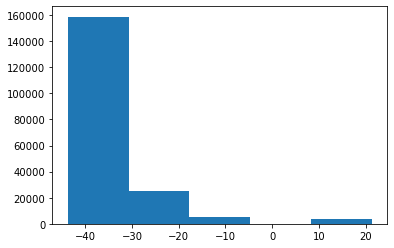

In [23]:
plt.hist(Frogml["decimalLatitude"], bins = 5)
plt.show()

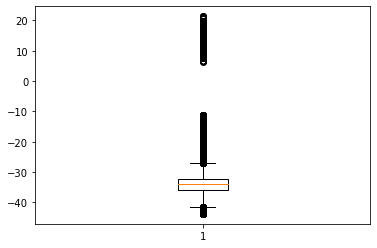

In [24]:
#boxplot to better explain the histogram
plt.boxplot(Frogml['decimalLatitude'])
plt.show()

# decimal Longitude

In [40]:
Frogml.decimalLongitude.describe()

count    193099.000000
mean        141.257961
std          33.744250
min         -99.221738
25%         144.673123
50%         150.024408
75%         151.197539
max         153.636442
Name: decimalLongitude, dtype: float64

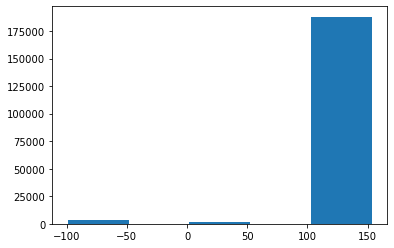

In [25]:
plt.hist(Frogml["decimalLongitude"], bins = 5)
plt.show()

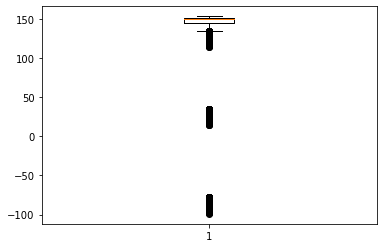

In [26]:
plt.boxplot(Frogml['decimalLongitude'])
plt.show()

# species

In [27]:
Frogml["species"].value_counts()

Crinia Signifera             126637
Litoria Fallax                47331
Crinia Glauerti                9392
Ranoidea Australis             4094
Agalychnis Callidryas          2027
Dendrobates Auratus            1535
Xenopus Laevis                  956
Chiromantis Xerampelina         586
Austrochaperina Pluvialis       541
Name: species, dtype: int64

The Crinia Signifera was the highest species recorded

# ppt_mean

In [41]:
Frogml.ppt_mean.describe()

count    193099.000000
mean         67.678357
std          29.497293
min           0.766667
25%          51.116665
50%          64.600000
75%          72.133330
max         368.750000
Name: ppt_mean, dtype: float64

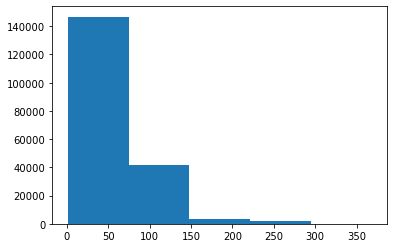

In [31]:
plt.hist(Frogml["ppt_mean"], bins = 5)
plt.show()

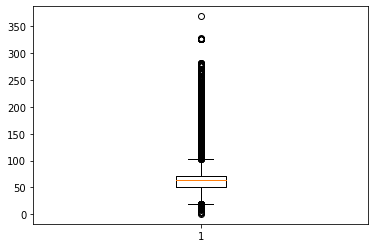

In [32]:
plt.boxplot(Frogml['ppt_mean'])
plt.show()

# soil_mean

In [42]:
Frogml.soil_mean.describe()

count    193099.000000
mean         53.545237
std          46.628495
min           0.000000
25%          26.066668
50%          45.800000
75%          63.700000
max         403.716670
Name: soil_mean, dtype: float64

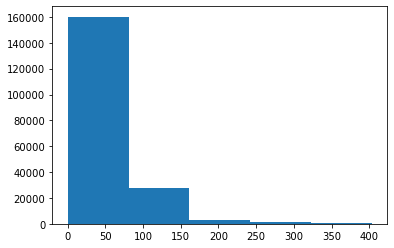

In [34]:
plt.hist(Frogml["soil_mean"], bins = 5)
plt.show()

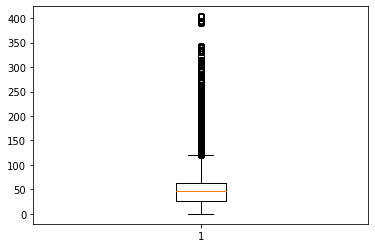

In [37]:
plt.boxplot(Frogml['soil_mean'])
plt.show()

# tmax_mean

In [43]:
Frogml.tmax_mean.describe()

count    193099.000000
mean         22.676570
std           3.273091
min          10.465001
25%          20.701666
50%          22.295000
75%          24.420004
max          37.401672
Name: tmax_mean, dtype: float64

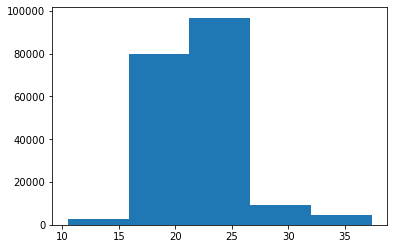

In [35]:
plt.hist(Frogml["tmax_mean"], bins = 5)
plt.show()

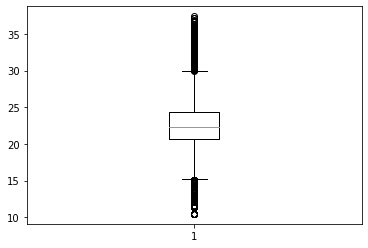

In [38]:
plt.boxplot(Frogml['tmax_mean'])
plt.show()

# tmin_mean

In [44]:
Frogml.tmin_mean.describe()

count    193099.000000
mean         11.144932
std           3.262068
min           0.758334
25%           9.060002
50%          10.809999
75%          12.721667
max          25.253334
Name: tmin_mean, dtype: float64

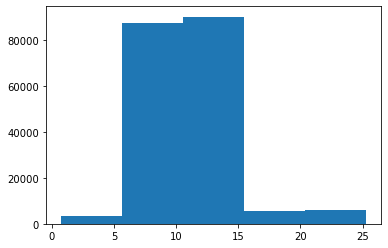

In [36]:
plt.hist(Frogml["tmin_mean"], bins = 5)
plt.show()

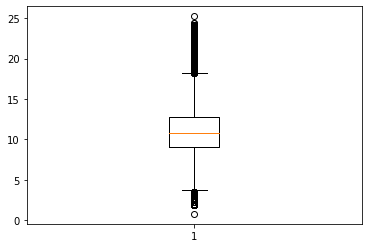

In [39]:
plt.boxplot(Frogml['tmin_mean'])
plt.show()

# MULTIVARIATE

# checking the continent with the highest species recorded

In [56]:
Australia_data = Frogml[Frogml['continent'] == 'Australia']
Africa_data = Frogml[Frogml['continent'] == 'Africa']
CentralAmerica_data = Frogml[Frogml['continent'] == 'Central America']


Text(0.5, 1.0, 'Australia')

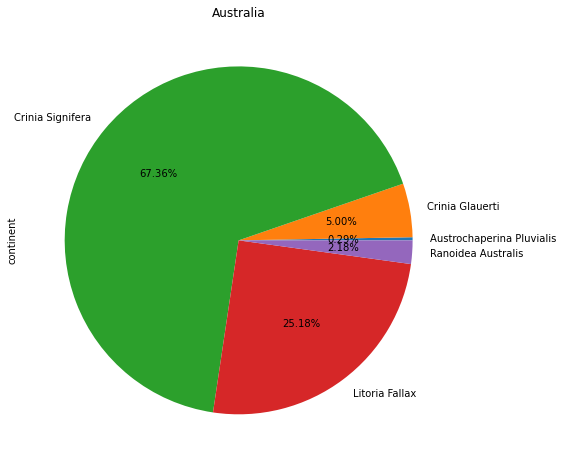

In [57]:
#checking Australia
Australia_data.groupby('species')['continent'].count().plot(kind = 'pie', autopct = '%1.2f%%', figsize = (8,8), fontsize = 10)
plt.title('Australia')

In Australia, the Crinia Signifera was the highest Species recorded and the Austrochaperina Pluvialis was the least species recorded

Text(0.5, 1.0, 'Africa')

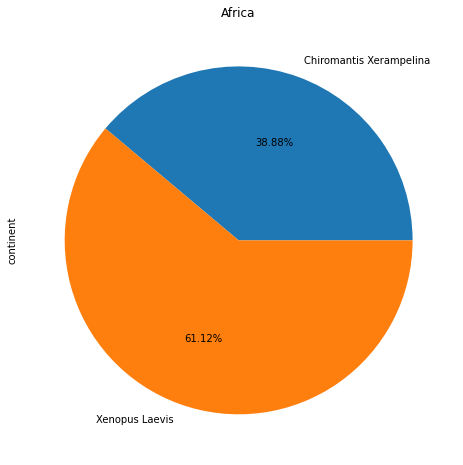

In [58]:
#checking Africa
Africa_data.groupby('species')['continent'].count().plot(kind = 'pie', autopct = '%1.2f%%', figsize = (8,8), fontsize = 10)
plt.title('Africa')

In Africa, the Chiromantis Xerampelina was the highest species recoreded and the xenopus laevis was the least recorded. Only two species were recorded in Africa

In [ ]:
#checking for Central America

Text(0.5, 1.0, 'Central America')

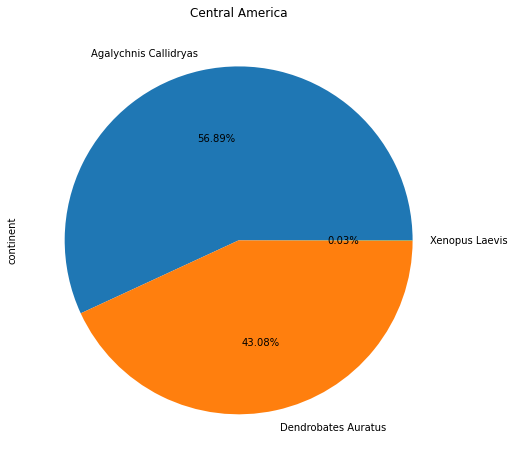

In [59]:
CentralAmerica_data.groupby('species')['continent'].count().plot(kind = 'pie', autopct = '%1.2f%%', figsize = (8,8), fontsize = 10)
plt.title('Central America')

In Central America, the Agalychnis Callidryas was the highest species recorded and the Xenopus Laevis was the least recorded

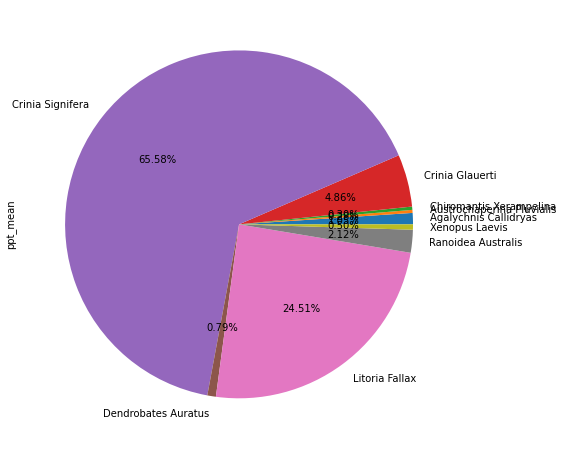

In [51]:
#checking the species against the ppt_mean
Frogml.groupby('species')['ppt_mean'].count().plot(kind = 'pie', autopct = '%1.2f%%', figsize = (8,8), fontsize = 10)
plt.show()

Crinia Signifera had the highest ppt_mean whilst the Chriromantis Xerampelina species had the least ppt_mean

In [67]:
#checking the continent with the min. temperature
Frogml.groupby(['continent', 'species'])['tmin_mean',].max()

tmin_mean
continent          species                             
Africa             Chiromantis Xerampelina    20.705004
                   Xenopus Laevis             17.950003
Australia          Austrochaperina Pluvialis  20.905000
                   Crinia Glauerti            18.586668
                   Crinia Signifera           21.785002
                   Litoria Fallax             21.785002
                   Ranoidea Australis         25.253334
Central America    Agalychnis Callidryas      24.465000
                   Dendrobates Auratus        24.465000
                   Xenopus Laevis              6.651668
unknown or invalid Chiromantis Xerampelina    17.025002
                   Xenopus Laevis             16.890001

Africa was the continent with the minimum temperature experienced

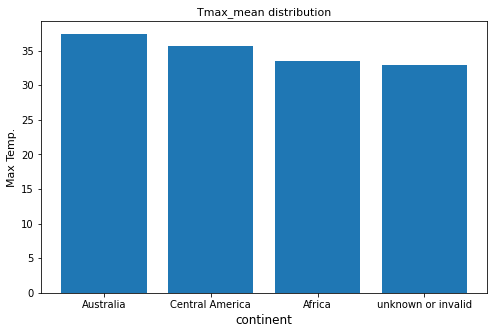

In [68]:
#Bar chart for the continent against the Tmax_mean
plt.figure(figsize= (8,5))
plt.bar(Frogml['continent'], Frogml['tmax_mean'])
plt.title('Tmax_mean distribution', fontsize= 11)
plt.xlabel('continent', fontsize= 12)
plt.ylabel('Max Temp.', fontsize= 11)
plt.show()

from the distribution, we can see Australia had the highest max. temp.